STATS 404 Homework 2 

Link to the Data Set: 
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/home  

In [2]:
import pandas as pd
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, \
                            mean_squared_error, roc_auc_score
import os

Download the data from the link above or test.csv and train.csv included in the folder. The data was split into a testing and training set found in test.csv and train.csv respectively. 

In [3]:
#Download the data and change directory to your directory
#training_name = "/Users/seannlau/Desktop/Grad School/MAS 404/human-activity-recognition-with-smartphones/train.csv"
#testing_name = "/Users/seannlau/Desktop/Grad School/MAS 404/human-activity-recognition-with-smartphones/train.csv"
dir_name = os.getcwd()
training_file = "train.csv"
testing_file = "test.csv"
training_name = os.path.join(dir_name, training_file)
testing_name = os.path.join(dir_name, testing_file)

In [4]:
train = pd.read_csv(filepath_or_buffer=training_name,
                 encoding='latin-1',
                 nrows=3609
                )

In [5]:
inspect.signature(pd.read_csv)

<Signature (filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [6]:
test = pd.read_csv(filepath_or_buffer=testing_name,
                 encoding='latin-1',
                 nrows=1542
                )

In [7]:
inspect.signature(pd.read_csv)

<Signature (filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)>

In [8]:
train.shape

(3609, 563)

In [9]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
3604,0.293316,-0.013523,-0.108274,0.350021,0.007491,-0.336062,0.301454,0.005145,-0.308498,0.536498,...,-0.812265,-0.506308,-0.319360,-0.926544,0.553580,-0.750098,0.264407,0.065658,17,WALKING_DOWNSTAIRS
3605,0.270713,-0.027077,-0.138842,-0.967419,-0.895151,-0.868173,-0.976268,-0.890496,-0.868398,-0.886681,...,0.458445,0.094082,0.176280,-0.254767,-0.152499,-0.740232,0.251008,-0.078908,19,STANDING
3606,0.271944,-0.045884,-0.126173,-0.991223,-0.950523,-0.914417,-0.991981,-0.951913,-0.912103,-0.933531,...,-0.859555,-0.054754,-0.045060,0.104774,0.623993,-0.740893,0.254909,-0.071021,19,STANDING
3607,0.284444,-0.028633,-0.171367,-0.986774,-0.942196,-0.939259,-0.989741,-0.949371,-0.933053,-0.912860,...,-0.844611,-0.008049,-0.083601,0.139678,0.350044,-0.730800,0.266245,-0.063743,19,STANDING
3608,0.280578,-0.015261,-0.124141,-0.986764,-0.933964,-0.896328,-0.989916,-0.938190,-0.888280,-0.912860,...,-0.308833,0.020519,0.023891,-0.151682,-0.728584,-0.732082,0.271724,-0.047999,19,STANDING


In [12]:
train.isnull().values.any()

False

In [13]:
test.shape

(1542, 563)

In [14]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [15]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [16]:
test.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
1537,0.263254,-0.031231,-0.139385,-0.969530,-0.916668,-0.928132,-0.978809,-0.908821,-0.923883,-0.931400,...,-0.803005,-0.044394,-0.847838,-0.539652,-0.035471,-0.688724,0.236693,0.187337,13,STANDING
1538,0.283557,-0.016500,-0.101646,-0.993043,-0.951936,-0.976742,-0.993786,-0.945324,-0.976706,-0.931400,...,-0.737616,-0.138077,-0.409843,-0.333212,0.846496,-0.673950,0.242703,0.195597,13,STANDING
1539,0.271884,-0.033647,-0.100334,-0.993603,-0.964014,-0.986683,-0.993971,-0.963580,-0.988199,-0.940798,...,-0.829670,0.001888,-0.425706,-0.087077,-0.112802,-0.675035,0.243518,0.193854,13,STANDING
1540,0.270978,-0.024400,-0.117194,-0.992830,-0.950465,-0.972312,-0.993022,-0.945331,-0.969318,-0.939150,...,-0.835495,-0.023743,0.325070,0.050936,-0.204517,-0.670928,0.249740,0.191892,13,STANDING
1541,0.277718,-0.007850,-0.122900,-0.994088,-0.979255,-0.976430,-0.994710,-0.980486,-0.975713,-0.938482,...,-0.862273,-0.003864,-0.128848,-0.178501,-0.189035,-0.666311,0.252051,0.194058,13,STANDING


In [17]:
test.isnull().values.any()

False

In [18]:
test_count = test['Activity'].value_counts(sort=True)

In [19]:
test_count

STANDING              281
WALKING               274
LAYING                270
SITTING               251
WALKING_UPSTAIRS      248
WALKING_DOWNSTAIRS    218
Name: Activity, dtype: int64

In [20]:
train_count = train['Activity'].value_counts(sort=True)

In [21]:
train_count

WALKING               655
STANDING              654
LAYING                648
SITTING               591
WALKING_UPSTAIRS      557
WALKING_DOWNSTAIRS    504
Name: Activity, dtype: int64

In [22]:
test.dtypes.value_counts(sort=False)

object       1
float64    561
int64        1
dtype: int64

In [23]:
train.dtypes.value_counts(sort=False)

object       1
float64    561
int64        1
dtype: int64

In [24]:
int64_column = train.select_dtypes(['int64'])

In [25]:
int64_column.head()

,subject
0,1
1,1
2,1
3,1
4,1


In [26]:
train.subject.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19])

In [27]:
test.subject.unique()

array([ 2,  4,  9, 10, 12, 13])

In [28]:
train.pop('subject')

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
3579    17
3580    17
3581    17
3582    17
3583    17
3584    17
3585    17
3586    17
3587    17
3588    17
3589    17
3590    17
3591    17
3592    17
3593    17
3594    17
3595    17
3596    17
3597    17
3598    17
3599    17
3600    17
3601    17
3602    17
3603    17
3604    17
3605    19
3606    19
3607    19
3608    19
Name: subject, Length: 3609, dtype: int64

In [29]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [30]:
test.pop('subject')

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
        ..
1512    12
1513    12
1514    12
1515    12
1516    12
1517    12
1518    12
1519    12
1520    12
1521    13
1522    13
1523    13
1524    13
1525    13
1526    13
1527    13
1528    13
1529    13
1530    13
1531    13
1532    13
1533    13
1534    13
1535    13
1536    13
1537    13
1538    13
1539    13
1540    13
1541    13
Name: subject, Length: 1542, dtype: int64

In [31]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,STANDING


In [32]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,0.273527,-0.017399,-0.108610,-0.581856,-0.466433,-0.580848,-0.608792,-0.484323,-0.580838,-0.443388,...,0.123761,-0.311405,-0.629786,0.010495,-0.002754,0.008288,-0.007869,-0.513180,0.063502,-0.015338
std,0.074134,0.031471,0.049261,0.448556,0.519746,0.430384,0.422080,0.500159,0.425485,0.544660,...,0.246268,0.321166,0.308698,0.350297,0.457028,0.617386,0.480793,0.471032,0.320621,0.261585
min,-1.000000,-0.684097,-1.000000,-1.000000,-0.999873,-0.999454,-1.000000,-1.000000,-0.999808,-0.971348,...,-0.965725,-0.944282,-0.999595,-0.976580,-0.996659,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.260603,-0.025631,-0.122316,-0.992602,-0.974060,-0.977109,-0.993341,-0.974043,-0.976617,-0.935992,...,-0.021906,-0.544330,-0.850139,-0.127504,-0.302814,-0.492839,-0.384808,-0.802116,0.024913,-0.081920
50%,0.276989,-0.017126,-0.108830,-0.908534,-0.699301,-0.728941,-0.918531,-0.719374,-0.729317,-0.825115,...,0.125923,-0.355853,-0.717998,0.008742,0.003230,0.009576,-0.003341,-0.697422,0.196372,0.022081
75%,0.289340,-0.009717,-0.096326,-0.237225,0.023866,-0.257646,-0.283158,0.002068,-0.256443,-0.009690,...,0.274953,-0.133438,-0.509944,0.163696,0.299304,0.520411,0.359163,-0.529744,0.262451,0.136282
max,0.631510,0.324130,0.543939,0.579153,0.832094,1.000000,0.544391,0.660297,1.000000,0.784666,...,0.918576,0.989538,0.956845,1.000000,0.998425,0.995769,0.996078,0.799174,0.445582,0.488889


I found that my training data set contains 3609 observations with 563 variables while my training data contained 1542 observations with 563 variables. In both the training and the testing data, there was a subject column, which contained the ID of the subject carrying out this test. Since no information was provided on the subject performing the test, that column was removed leading to 562 variables. 561 of the variables represented time and frequency domain variables of the experiment. The final variable contained the activity label for each of the rows. The data set also contained no missing values for both the test and training set. See https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/home for additional documentation.

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

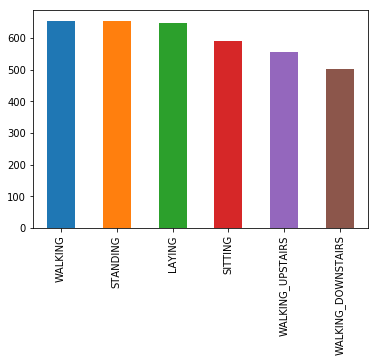

In [34]:
train['Activity'].value_counts(sort=True).plot(kind='bar')

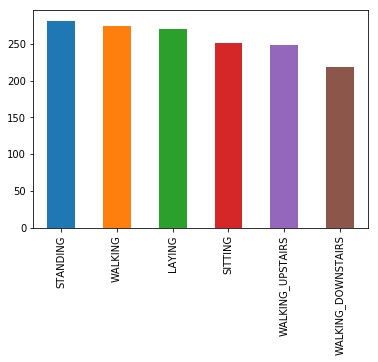

In [35]:
test['Activity'].value_counts(sort=True).plot(kind='bar')

The data sets contain 6 distinct activities. The graphs above show that the number of occurrences of each activity for both the testing and training data. The graphs show that the distribution among activities is fairly similar among within and between both data sets. 

In [36]:
corr_on_these_columns = train.columns[:-1]
corr_values = train[corr_on_these_columns].corr()

In [37]:
abs_corr_values = corr_values.abs()

In [38]:
abs_corr_values.head(10)
abs_corr_values.tail(10)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
fBodyBodyGyroJerkMag-meanFreq(),0.051729,0.013628,0.022421,0.114466,0.149048,0.130018,0.111567,0.147510,0.131044,0.116623,...,1.000000,0.432245,0.302784,0.010993,0.000528,0.030186,0.013132,0.038626,0.057248,0.014733
fBodyBodyGyroJerkMag-skewness(),0.033132,0.015124,0.013517,0.110263,0.171082,0.100837,0.111161,0.168519,0.106949,0.115413,...,0.432245,1.000000,0.968143,0.012806,0.025252,0.042898,0.035166,0.071880,0.030150,0.020031
fBodyBodyGyroJerkMag-kurtosis(),0.030393,0.016583,0.016163,0.077198,0.141451,0.073809,0.078183,0.140030,0.080556,0.083497,...,0.302784,0.968143,1.000000,0.016135,0.030162,0.033908,0.028597,0.078075,0.028794,0.026460
"angle(tBodyAccMean,gravity)",0.537169,0.098383,0.077338,0.038117,0.017756,0.000083,0.047356,0.022437,0.002337,0.033917,...,0.010993,0.012806,0.016135,1.000000,0.091056,0.009381,0.032010,0.015271,0.004304,0.007469
"angle(tBodyAccJerkMean),gravityMean)",0.017473,0.037037,0.041435,0.013785,0.009366,0.016370,0.014068,0.011382,0.018144,0.012425,...,0.000528,0.025252,0.030162,0.091056,1.000000,0.032358,0.019605,0.021197,0.006430,0.006834
"angle(tBodyGyroMean,gravityMean)",0.031991,0.015642,0.082395,0.006533,0.017264,0.031706,0.005460,0.023953,0.035566,0.016734,...,0.030186,0.042898,0.033908,0.009381,0.032358,1.000000,0.159409,0.007684,0.013153,0.036380
"angle(tBodyGyroJerkMean,gravityMean)",0.022377,0.065119,0.037993,0.025238,0.012160,0.005181,0.024678,0.009749,0.005130,0.032166,...,0.013132,0.035166,0.028597,0.032010,0.019605,0.159409,1.000000,0.033451,0.010041,0.000546
"angle(X,gravityMean)",0.058346,0.027517,0.004840,0.355776,0.363569,0.284434,0.355122,0.362214,0.290604,0.362834,...,0.038626,0.071880,0.078075,0.015271,0.021197,0.007684,0.033451,1.000000,0.779220,0.606711
"angle(Y,gravityMean)",0.037494,0.021800,0.027387,0.459550,0.511307,0.452338,0.455485,0.515449,0.457364,0.469629,...,0.057248,0.030150,0.028794,0.004304,0.006430,0.013153,0.010041,0.779220,1.000000,0.420101
"angle(Z,gravityMean)",0.064228,0.000341,0.039224,0.364347,0.399945,0.494068,0.361699,0.398951,0.490453,0.378636,...,0.014733,0.020031,0.026460,0.007469,0.006834,0.036380,0.000546,0.606711,0.420101,1.000000


In [39]:
abs_corr_values['angle(X,gravityMean)'].sort_values(ascending = False).head(10)

angle(X,gravityMean)      1.000000
tGravityAcc-energy()-X    0.991948
tGravityAcc-mean()-X      0.987769
tGravityAcc-min()-X       0.986844
tGravityAcc-max()-X       0.983539
tGravityAcc-energy()-Y    0.823226
angle(Y,gravityMean)      0.779220
tGravityAcc-max()-Y       0.769547
tGravityAcc-mean()-Y      0.768017
tGravityAcc-min()-Y       0.765798
Name: angle(X,gravityMean), dtype: float64

In [40]:
abs_corr_values['angle(Y,gravityMean)'].sort_values(ascending = False).head(10)

angle(Y,gravityMean)      1.000000
tGravityAcc-mean()-Y      0.992824
tGravityAcc-max()-Y       0.990933
tGravityAcc-min()-Y       0.990218
tGravityAcc-energy()-Y    0.894952
tGravityAcc-energy()-X    0.812217
tGravityAcc-max()-X       0.810761
tGravityAcc-mean()-X      0.810569
tGravityAcc-min()-X       0.807006
angle(X,gravityMean)      0.779220
Name: angle(Y,gravityMean), dtype: float64

In [41]:
abs_corr_values['angle(Z,gravityMean)'].sort_values(ascending = False).head(10)

angle(Z,gravityMean)      1.000000
tGravityAcc-mean()-Z      0.994293
tGravityAcc-max()-Z       0.991728
tGravityAcc-min()-Z       0.989902
tGravityAcc-energy()-Z    0.709247
tGravityAcc-mean()-X      0.656812
tGravityAcc-min()-X       0.655341
tGravityAcc-max()-X       0.653533
tGravityAcc-energy()-X    0.624532
angle(X,gravityMean)      0.606711
Name: angle(Z,gravityMean), dtype: float64

I also found that some of the columns are highly correlated with other columns such as the tables shown above while other columns are not highly correlated with other columns shown below. The correlation between variable might be something to look more into in the future. 

In [42]:
abs_corr_values['tBodyAcc-mean()-X'].sort_values(ascending = False).head(10)

tBodyAcc-mean()-X              1.000000
angle(tBodyAccMean,gravity)    0.537169
tGravityAcc-iqr()-X            0.529312
tGravityAcc-mad()-X            0.515259
tGravityAcc-std()-X            0.507877
tGravityAcc-mad()-Y            0.297909
tGravityAcc-std()-Y            0.297308
tGravityAcc-iqr()-Y            0.294034
tGravityAcc-std()-Z            0.277990
tGravityAcc-mad()-Z            0.273157
Name: tBodyAcc-mean()-X, dtype: float64

In [43]:
abs_corr_values['tBodyAcc-mean()-Y'].sort_values(ascending = False).head(10)

tBodyAcc-mean()-Y                   1.000000
tBodyAcc-entropy()-Y                0.180086
tBodyGyroJerk-mean()-X              0.166307
tBodyGyroJerk-mean()-Z              0.164640
tBodyAcc-min()-Y                    0.143399
tGravityAcc-iqr()-X                 0.121317
tBodyGyro-energy()-X                0.116679
fBodyAccJerk-bandsEnergy()-1,8.1    0.116675
fBodyAccMag-min()                   0.116278
tBodyGyro-min()-X                   0.113162
Name: tBodyAcc-mean()-Y, dtype: float64

In [44]:
abs_corr_values['tBodyAcc-mean()-Z'].sort_values(ascending = False).head(10)

tBodyAcc-mean()-Z         1.000000
tBodyAcc-entropy()-Z      0.290964
tBodyGyroJerk-mean()-Y    0.223884
tGravityAcc-iqr()-X       0.199452
tBodyAccJerk-mean()-Z     0.176028
tGravityAcc-mad()-X       0.171978
tGravityAcc-iqr()-Y       0.170222
tGravityAcc-std()-X       0.161851
tGravityAcc-mad()-Y       0.159065
tGravityAcc-std()-Y       0.154578
Name: tBodyAcc-mean()-Z, dtype: float64

In [45]:
train.groupby('Activity').mean()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.263903,-0.018654,-0.108343,-0.957706,-0.937454,-0.937588,-0.960411,-0.938845,-0.937007,-0.911495,...,0.145645,-0.342496,-0.662638,0.015162,0.012732,0.017888,0.015719,0.453640,-0.502988,-0.394758
SITTING,0.273927,-0.010250,-0.106726,-0.981384,-0.921649,-0.929737,-0.983636,-0.921765,-0.927377,-0.923227,...,0.165050,-0.361185,-0.663785,0.012152,-0.003669,0.019877,-0.040293,-0.752715,0.018036,-0.039935
STANDING,0.280305,-0.015582,-0.106243,-0.983506,-0.934973,-0.937926,-0.986080,-0.935701,-0.935482,-0.920674,...,0.130692,-0.365593,-0.669626,0.006925,0.008115,0.012942,0.006816,-0.761123,0.204257,0.061122
WALKING,0.275595,-0.018163,-0.109162,-0.327872,0.028233,-0.274606,-0.365196,-0.004816,-0.271561,-0.137782,...,0.112963,-0.111374,-0.442675,0.027027,-0.021012,-0.009273,-0.003738,-0.736918,0.224578,0.093349
WALKING_DOWNSTAIRS,0.288372,-0.015766,-0.105428,0.152438,0.086054,-0.147136,0.079455,0.017727,-0.167027,0.470403,...,0.094102,-0.343998,-0.685029,-0.039575,-0.013467,0.184733,-0.088149,-0.764140,0.204845,0.086900
WALKING_UPSTAIRS,0.260480,-0.026238,-0.115932,-0.212185,0.033065,-0.128947,-0.268224,0.020436,-0.120511,-0.015491,...,0.085891,-0.364524,-0.678760,0.033362,-0.001397,-0.159647,0.049634,-0.602492,0.288203,0.142073


In [46]:
train.groupby('Activity').std()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.115471,0.038873,0.064033,0.095814,0.136407,0.137330,0.091786,0.134635,0.143828,0.045305,...,0.286778,0.316491,0.278422,0.209168,0.338899,0.358145,0.388636,0.120895,0.336884,0.334569
SITTING,0.041596,0.036887,0.050237,0.037521,0.150717,0.137987,0.034342,0.154588,0.149486,0.050096,...,0.298350,0.332425,0.307484,0.153003,0.297642,0.345156,0.357782,0.166778,0.120843,0.139748
STANDING,0.025215,0.020177,0.042407,0.026648,0.088605,0.103906,0.023246,0.090424,0.112303,0.041879,...,0.328039,0.326689,0.287734,0.124405,0.249679,0.488236,0.525795,0.098743,0.074586,0.119548
WALKING,0.049651,0.021944,0.031355,0.103584,0.190758,0.240979,0.100640,0.182113,0.229358,0.173442,...,0.152280,0.337083,0.384240,0.474604,0.531394,0.650882,0.485872,0.104622,0.060594,0.118409
WALKING_DOWNSTAIRS,0.090688,0.026792,0.050223,0.188586,0.250149,0.285360,0.201590,0.219493,0.264774,0.145202,...,0.172603,0.215216,0.198530,0.513326,0.632629,0.840845,0.535488,0.105815,0.062720,0.113695
WALKING_UPSTAIRS,0.081776,0.037274,0.051709,0.148709,0.215899,0.303195,0.139031,0.215101,0.288554,0.212217,...,0.134118,0.276551,0.265577,0.442551,0.599516,0.850155,0.561678,0.109662,0.079582,0.156752


The potential modeling approaches I would consider using are K nearest neighbor, some type of decision tree like random forest, or logistic regression. 

Start of Modeling - Homework 3

I decided to split the provided training data into a training set and a validation set. The training set being 75% and the validation set being 25%.

In [47]:
df_train, df_valid = train_test_split(train,test_size=0.25,random_state=2000,stratify=train['Activity'])

In [48]:
df_train['Activity'].value_counts(sort=False)

WALKING_UPSTAIRS      418
WALKING_DOWNSTAIRS    378
STANDING              490
LAYING                486
SITTING               443
WALKING               491
Name: Activity, dtype: int64

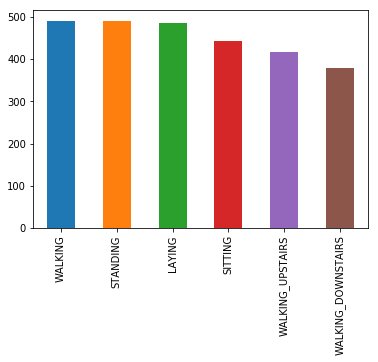

In [49]:
df_train['Activity'].value_counts(sort=True).plot(kind='bar')

In [50]:
df_valid['Activity'].value_counts(sort=False)

SITTING               148
STANDING              164
WALKING_UPSTAIRS      139
LAYING                162
WALKING_DOWNSTAIRS    126
WALKING               164
Name: Activity, dtype: int64

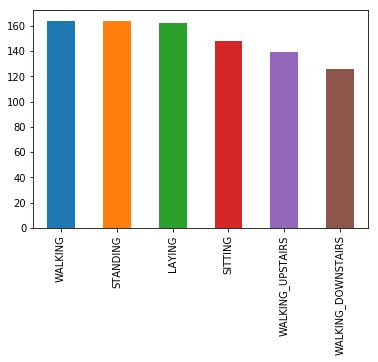

In [51]:
df_valid['Activity'].value_counts(sort=True).plot(kind='bar')

From the graphs above it is clear to see that the training and the validation training set have similiar distriution for each of the activities. 

In [52]:
Activity_outcome = df_train['Activity']
training_features = df_train.drop(columns = ['Activity'])

In [53]:
training_features.shape

(2706, 561)

I first wanted to try a random forest classifier for a model. Below I chose to try different amounts of trees to see about how many are needed before the out of bag error started to level off. I chose to use a conservative minimum sample leaf size of 30 for my random forest. 

In [54]:
n_trees = [50,100,250,500,1000,1500,2500,5000,10000]

In [55]:
rf_dict = dict.fromkeys(n_trees)

In [56]:
for iteration in n_trees: 
    print(iteration)
    rf = RandomForestClassifier(n_estimators = iteration,
                               min_samples_leaf = 30,
                               oob_score = True,
                               random_state = 2000,
                               class_weight='balanced',
                               verbose = 1)
    rf.fit(training_features, Activity_outcome)
    rf_dict[iteration] =rf

50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


250


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    5.6s finished


500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.3s finished


1000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   23.3s finished


1500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   34.1s finished


2500


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   59.4s finished


5000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  1.9min finished


10000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  4.0min finished


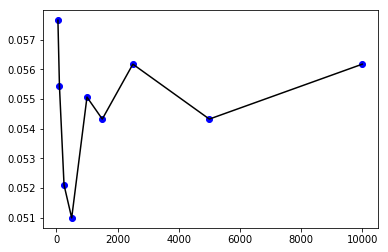

In [57]:
oob_error_list = [None]*len(n_trees)

for i in range(len(n_trees)):
    oob_error_list[i] = 1 - rf_dict[n_trees[i]].oob_score_
else:
    plt.plot(n_trees, oob_error_list, 'bo',
             n_trees, oob_error_list, 'k')

Even though the out of bag score was lowest at the 500 iteration point, I decided to go with the 1500 iteration random forest as the error seems to converge after about that many iterations. 

In [58]:
forest = rf_dict[1500]
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

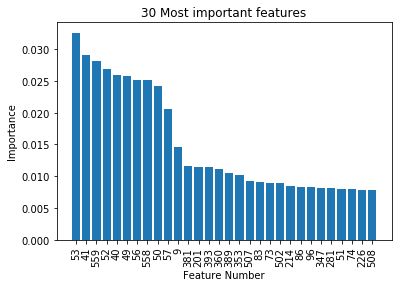

In [59]:
ax = plt.gca()
top = 30
plt.title(f"{top} Most important features")
plt.bar(range(top),importances[indices[0:top]])
plt.xticks(range(top))
ax.set_xticklabels(indices[0:top],rotation = 90)
ax.set_xlabel("Feature Number")
ax.set_ylabel("Importance")
plt.show()

In [60]:
position = indices[0:11]

In [61]:
column_name = df_train.columns[position]
print(column_name)

Index(['tGravityAcc-min()-Y', 'tGravityAcc-mean()-Y', 'angle(Y,gravityMean)',
       'tGravityAcc-min()-X', 'tGravityAcc-mean()-X', 'tGravityAcc-max()-X',
       'tGravityAcc-energy()-X', 'angle(X,gravityMean)', 'tGravityAcc-max()-Y',
       'tGravityAcc-energy()-Y', 'tBodyAcc-max()-X'],
      dtype='object')


From the importance graph, there is a big drop off in terms of importance after the 11th variable. The above cell lists the names of the most influential columns in order of importance.

In [62]:
outcome_predict_training = forest.predict(training_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.9s finished


In [63]:
outcome_predict_training[0:10]

array(['LAYING', 'LAYING', 'WALKING_DOWNSTAIRS', 'STANDING', 'SITTING',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING', 'WALKING',
       'STANDING'], dtype=object)

In [64]:
len(outcome_predict_training)

2706

In [65]:
unique, counts = np.unique(outcome_predict_training, return_counts=True)
label_dict = dict(zip(unique, counts))
label_dict

{'LAYING': 485,
 'SITTING': 465,
 'STANDING': 468,
 'WALKING': 490,
 'WALKING_DOWNSTAIRS': 383,
 'WALKING_UPSTAIRS': 415}

In [66]:
unique_truth, counts_truth = np.unique(Activity_outcome, return_counts=True)
label_counts_dict = dict(zip(unique_truth, counts_truth))
label_counts_dict

{'LAYING': 486,
 'SITTING': 443,
 'STANDING': 490,
 'WALKING': 491,
 'WALKING_DOWNSTAIRS': 378,
 'WALKING_UPSTAIRS': 418}

In [67]:
conf_mat = confusion_matrix(y_true = Activity_outcome,
                            y_pred = outcome_predict_training)
conf_mat

array([[485,   0,   0,   0,   0,   1],
       [  0, 422,  21,   0,   0,   0],
       [  0,  43, 447,   0,   0,   0],
       [  0,   0,   0, 479,   6,   6],
       [  0,   0,   0,   9, 367,   2],
       [  0,   0,   0,   2,  10, 406]])

In [68]:
label_keys ={
    0: "Laying",
    1: "Sitting",
    2: "Standing",
    3: "Walking",
    4: "Walking_Downstairs",
    5: "Walking_Upstairs"
}

In [69]:
labels = [label_keys[x] for x in range(6)]

In [70]:
conf_df = pd.DataFrame(conf_mat, labels, labels)
conf_df

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,485,0,0,0,0,1
Sitting,0,422,21,0,0,0
Standing,0,43,447,0,0,0
Walking,0,0,0,479,6,6
Walking_Downstairs,0,0,0,9,367,2
Walking_Upstairs,0,0,0,2,10,406


In [71]:
conf_df_pct = conf_df/conf_df.sum(axis=1)
round(conf_df_pct, 2)

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,1.0,0.00,0.00,0.00,0.00,0.00
Sitting,0.0,0.95,0.04,0.00,0.00,0.00
Standing,0.0,0.10,0.91,0.00,0.00,0.00
Walking,0.0,0.00,0.00,0.98,0.02,0.01
Walking_Downstairs,0.0,0.00,0.00,0.02,0.97,0.00
Walking_Upstairs,0.0,0.00,0.00,0.00,0.03,0.97


In [72]:
f1_score(y_true = Activity_outcome,
         y_pred = outcome_predict_training,
         average= 'macro')

0.962924087827365

In [73]:
f1_score(y_true = Activity_outcome,
         y_pred = outcome_predict_training,
         average= 'micro')

0.9630450849963045

Performing a confusion matrix on my model with the training set showed that the random forest model did very well in predicting all the different activities. Additionally, the micro and macro f scores were really good as well. 

In [74]:
Validation_outcome = df_valid['Activity']
Validation_features = df_valid.drop(columns = ['Activity'])

In [75]:
outcome_predict_Validation = forest.predict(Validation_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.4s finished


In [76]:
outcome_predict_Validation[0:10]

array(['WALKING', 'SITTING', 'WALKING', 'SITTING', 'STANDING', 'STANDING',
       'LAYING', 'SITTING', 'WALKING', 'WALKING_DOWNSTAIRS'], dtype=object)

In [77]:
len(outcome_predict_Validation)

903

In [78]:
df_valid.shape

(903, 562)

In [79]:
unique_valid, counts_valid = np.unique(outcome_predict_Validation, return_counts=True)
label_counts_dict_v = dict(zip(unique_valid, counts_valid))
label_counts_dict_v

{'LAYING': 162,
 'SITTING': 160,
 'STANDING': 152,
 'WALKING': 170,
 'WALKING_DOWNSTAIRS': 121,
 'WALKING_UPSTAIRS': 138}

In [80]:
unique_v, counts_v = np.unique(Validation_outcome, return_counts=True)
label_dict_v = dict(zip(unique_v, counts_v))
label_dict_v

{'LAYING': 162,
 'SITTING': 148,
 'STANDING': 164,
 'WALKING': 164,
 'WALKING_DOWNSTAIRS': 126,
 'WALKING_UPSTAIRS': 139}

In [81]:
conf_mat_v = confusion_matrix(y_true = Validation_outcome,
                             y_pred = outcome_predict_Validation)
conf_mat_v

array([[162,   0,   0,   0,   0,   0],
       [  0, 134,  14,   0,   0,   0],
       [  0,  26, 138,   0,   0,   0],
       [  0,   0,   0, 162,   1,   1],
       [  0,   0,   0,   8, 115,   3],
       [  0,   0,   0,   0,   5, 134]])

In [82]:
conf_df_v = pd.DataFrame(conf_mat_v, labels, labels)
conf_df_v

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,162,0,0,0,0,0
Sitting,0,134,14,0,0,0
Standing,0,26,138,0,0,0
Walking,0,0,0,162,1,1
Walking_Downstairs,0,0,0,8,115,3
Walking_Upstairs,0,0,0,0,5,134


In [83]:
conf_df_pct_v = conf_df_v/conf_df_v.sum(axis=1)
round(conf_df_pct_v, 2)

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,1.0,0.00,0.00,0.00,0.00,0.00
Sitting,0.0,0.91,0.09,0.00,0.00,0.00
Standing,0.0,0.18,0.84,0.00,0.00,0.00
Walking,0.0,0.00,0.00,0.99,0.01,0.01
Walking_Downstairs,0.0,0.00,0.00,0.05,0.91,0.02
Walking_Upstairs,0.0,0.00,0.00,0.00,0.04,0.96


In [84]:
f1_score(y_true = Validation_outcome,
         y_pred = outcome_predict_Validation,
         average= 'macro')

0.935381764371327

In [85]:
f1_score(y_true = Validation_outcome,
         y_pred = outcome_predict_Validation,
         average= 'micro')

0.9357696566998892

Performing a confusion matrix using the validation set, using the random forest model, shows that our prediction rate was still really good. There was a slight difference in correctly predicting standing but still around 85% successful. The f scores are also still pretty high.

In [86]:
from sklearn.neighbors import KNeighborsClassifier as knn

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

Next I wanted to try a k nearest neighbor approach. The K nearest neighbor function I used is explained in more detail in the link above.

In [87]:
from sklearn import preprocessing 

In [88]:
encoder = preprocessing.LabelEncoder()
encoder.fit(Activity_outcome)

LabelEncoder()

In [89]:
training_Labels_encoded = encoder.transform(Activity_outcome)

In [90]:
training_Labels_encoded[0:10]

array([0, 0, 4, 2, 2, 5, 5, 3, 3, 2])

In [91]:
encoder2 = preprocessing.LabelEncoder()
encoder2.fit(Validation_outcome)

LabelEncoder()

In [92]:
Validation_Labels_encoded = encoder.transform(Validation_outcome)
Validation_Labels_encoded[0:10]

array([3, 1, 3, 1, 2, 2, 0, 1, 3, 4])

Below I decided to use the closest 20 points and weight each point by the inverse of the distance to it's neighbors. This means that the closer neighbors get a higher weight than further neighbors.

In [93]:
knn_classifier = knn(n_neighbors = 20, weights='distance')
knn_Model = knn_classifier.fit(training_features, Activity_outcome)

In [94]:
knn_training_outcomes = knn_Model.predict(training_features)

In [95]:
knn_unique, knn_counts = np.unique(knn_training_outcomes, return_counts=True)
label_dict_knn = dict(zip(knn_unique, knn_counts))
label_dict_knn

{'LAYING': 486,
 'SITTING': 443,
 'STANDING': 490,
 'WALKING': 491,
 'WALKING_DOWNSTAIRS': 378,
 'WALKING_UPSTAIRS': 418}

In [96]:
label_counts_dict

{'LAYING': 486,
 'SITTING': 443,
 'STANDING': 490,
 'WALKING': 491,
 'WALKING_DOWNSTAIRS': 378,
 'WALKING_UPSTAIRS': 418}

In [97]:
conf_mat_knn = confusion_matrix(y_true = Activity_outcome,
                            y_pred = knn_training_outcomes)
conf_mat_knn

array([[486,   0,   0,   0,   0,   0],
       [  0, 443,   0,   0,   0,   0],
       [  0,   0, 490,   0,   0,   0],
       [  0,   0,   0, 491,   0,   0],
       [  0,   0,   0,   0, 378,   0],
       [  0,   0,   0,   0,   0, 418]])

In [98]:
conf_df_knn = pd.DataFrame(conf_mat_knn, labels, labels)
conf_df_knn

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,486,0,0,0,0,0
Sitting,0,443,0,0,0,0
Standing,0,0,490,0,0,0
Walking,0,0,0,491,0,0
Walking_Downstairs,0,0,0,0,378,0
Walking_Upstairs,0,0,0,0,0,418


In [99]:
knn_validation_outcomes = knn_Model.predict(Validation_features)

In [100]:
knn_unique_v, knn_counts_v = np.unique(knn_validation_outcomes, return_counts=True)
label_dict_knn_v = dict(zip(knn_unique_v, knn_counts_v))
label_dict_knn_v

{'LAYING': 162,
 'SITTING': 123,
 'STANDING': 189,
 'WALKING': 166,
 'WALKING_DOWNSTAIRS': 123,
 'WALKING_UPSTAIRS': 140}

In [101]:
label_dict_v

{'LAYING': 162,
 'SITTING': 148,
 'STANDING': 164,
 'WALKING': 164,
 'WALKING_DOWNSTAIRS': 126,
 'WALKING_UPSTAIRS': 139}

In [102]:
conf_mat_knn_v = confusion_matrix(y_true = Validation_outcome,
                            y_pred = knn_validation_outcomes)
conf_mat_knn_v

array([[162,   0,   0,   0,   0,   0],
       [  0, 107,  41,   0,   0,   0],
       [  0,  16, 148,   0,   0,   0],
       [  0,   0,   0, 164,   0,   0],
       [  0,   0,   0,   2, 123,   1],
       [  0,   0,   0,   0,   0, 139]])

In [103]:
conf_df_knn_v = pd.DataFrame(conf_mat_knn_v, labels, labels)
conf_df_knn_v

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,162,0,0,0,0,0
Sitting,0,107,41,0,0,0
Standing,0,16,148,0,0,0
Walking,0,0,0,164,0,0
Walking_Downstairs,0,0,0,2,123,1
Walking_Upstairs,0,0,0,0,0,139


In [104]:
conf_df_pct_knn_v = conf_df_knn_v/conf_df_knn_v.sum(axis=1)
round(conf_df_pct_knn_v, 3)

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,1.0,0.000,0.000,0.000,0.000,0.000
Sitting,0.0,0.723,0.250,0.000,0.000,0.000
Standing,0.0,0.108,0.902,0.000,0.000,0.000
Walking,0.0,0.000,0.000,1.000,0.000,0.000
Walking_Downstairs,0.0,0.000,0.000,0.012,0.976,0.007
Walking_Upstairs,0.0,0.000,0.000,0.000,0.000,1.000


Performing a K nearest neighbor on the training data produced 100% accuracy in predicting the activities. This made me believe that this model was overfitting the training data. However, when testing the k nearest neighbor on the validation data set, I was able to still get above 90% correct classifications for everyting but sitting. 

Comparing the two models it seems that the random forest model performs better than the k nearest neighbor model. However, on the validation model the k nearest neigbor did better on the standing category but worse on the sitting category. I want to ensemble the two models to try to slightly improve the standing category and hopefully not degrade the sitting category by too much. 

In [105]:
from sklearn.ensemble import VotingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html 

In [106]:
ensembled_models = VotingClassifier([('rf',forest),('knn',knn_Model)],voting='hard')

In [107]:
ensembled_models.fit(training_features,Activity_outcome)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   36.4s finished


VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=30,
            min_samples_split=2,...',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='distance'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [109]:
ensembled_outcomes = ensembled_models.predict(Validation_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.5s finished


In [110]:
ensembled_unique_v, ensembled_counts_v = np.unique(ensembled_outcomes, return_counts=True)
label_dict_ensembled_v = dict(zip(ensembled_unique_v, ensembled_counts_v))
label_dict_ensembled_v

{'LAYING': 162,
 'SITTING': 168,
 'STANDING': 144,
 'WALKING': 172,
 'WALKING_DOWNSTAIRS': 123,
 'WALKING_UPSTAIRS': 134}

In [111]:
conf_mat_ens_v = confusion_matrix(y_true = Validation_outcome,
                            y_pred = ensembled_outcomes)
conf_mat_ens_v

array([[162,   0,   0,   0,   0,   0],
       [  0, 136,  12,   0,   0,   0],
       [  0,  32, 132,   0,   0,   0],
       [  0,   0,   0, 164,   0,   0],
       [  0,   0,   0,   8, 118,   0],
       [  0,   0,   0,   0,   5, 134]])

In [112]:
conf_df_ens_v = pd.DataFrame(conf_mat_ens_v, labels, labels)
conf_df_ens_v

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,162,0,0,0,0,0
Sitting,0,136,12,0,0,0
Standing,0,32,132,0,0,0
Walking,0,0,0,164,0,0
Walking_Downstairs,0,0,0,8,118,0
Walking_Upstairs,0,0,0,0,5,134


This is the confusion matrix for the ensembled model:

In [113]:
conf_df_pct_ens_v = conf_df_ens_v/conf_df_ens_v.sum(axis=1)
round(conf_df_pct_ens_v, 3)

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,1.0,0.000,0.000,0.000,0.000,0.000
Sitting,0.0,0.919,0.073,0.000,0.000,0.000
Standing,0.0,0.216,0.805,0.000,0.000,0.000
Walking,0.0,0.000,0.000,1.000,0.000,0.000
Walking_Downstairs,0.0,0.000,0.000,0.049,0.937,0.000
Walking_Upstairs,0.0,0.000,0.000,0.000,0.040,0.964


This is the confusion matrix for the k nearest neighbor model again: 

In [114]:
round(conf_df_pct_knn_v, 3)

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,1.0,0.000,0.000,0.000,0.000,0.000
Sitting,0.0,0.723,0.250,0.000,0.000,0.000
Standing,0.0,0.108,0.902,0.000,0.000,0.000
Walking,0.0,0.000,0.000,1.000,0.000,0.000
Walking_Downstairs,0.0,0.000,0.000,0.012,0.976,0.007
Walking_Upstairs,0.0,0.000,0.000,0.000,0.000,1.000


Finally this is the confusion matrix for the random forest model:

In [115]:
round(conf_df_pct_v, 3)

,Laying,Sitting,Standing,Walking,Walking_Downstairs,Walking_Upstairs
Laying,1.0,0.000,0.000,0.000,0.000,0.000
Sitting,0.0,0.905,0.085,0.000,0.000,0.000
Standing,0.0,0.176,0.841,0.000,0.000,0.000
Walking,0.0,0.000,0.000,0.988,0.008,0.007
Walking_Downstairs,0.0,0.000,0.000,0.049,0.913,0.022
Walking_Upstairs,0.0,0.000,0.000,0.000,0.040,0.964


Unfortunately, the random forest model still performed the best. Therefore, I would like to go with just stick with the random forest model. 